In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [71]:
import seaborn as sns
import seaborn.objects as so
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

from helpers.variable_interfaces import all_variables as vars

# from setup.data_wrangle import *
# from setup.materials_setup import *
# from analysis.dataframes import *
# from analysis.volumes import *

from experiments.retrieve import retrieve_comparison_groups, retrieve_control_cases, get_experiment_folders
from experiments.name_splits import *
# sns.set_style("darkgrid")

from analysis2.all_cases_v_time import create_space_and_site_dfs
from setup.data_wrangle2 import create_wide_dataframe_for_many_qois_and_cases


In [75]:
exp_folders = get_experiment_folders()
[folder] = [i for i in exp_folders if "windows" in i.name]
folder

PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_windows')

In [76]:
[i for i in folder.iterdir()]

[PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_windows/.DS_Store'),
 PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_windows/red_b1_0.7'),
 PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_windows/bol_5_0.7'),
 PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_windows/amb_b1_0.7'),
 PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_windows/red_b1_1.3'),
 PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_windows/bol_5_1.3'),
 PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_windows/amb_b1_1.3')]

In [77]:
cases = retrieve_comparison_groups("windows")
cases

# get_experiment_folders()

[CaseData(case_name='red_b1_0.7', idf=<geomeppy.idf.IDF object at 0x163d8c520>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_windows/red_b1_0.7/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_red_b1'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_windows/red_b1_0.7')),
 CaseData(case_name='bol_5_0.7', idf=<geomeppy.idf.IDF object at 0x1640284c0>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_windows/bol_5_0.7/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_bol_5'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_windows/bol_5_0.7')),
 CaseData(case_name='amb_b1_0.7', idf=<geomeppy.idf.IDF object at 0x164028490>, sql=Energy SQLiteResult: /Users/julietnwagwuume-

In [78]:
df_temp = create_wide_dataframe_for_many_qois_and_cases(cases, [vars.zone.temp["zone_mean_air_temp"]])

df, df_site = create_space_and_site_dfs(cases=cases, space_qois=[vars.afn.zone["vent_vol"], vars.afn.zone["mix_vol"]], site_qois=[vars.site.wind["speed"]])

In [79]:
df_vol = df.join(df_temp, on=["case_names", "space_names", "datetimes"]).with_columns(combined_vent =pl.col("AFN Zone Ventilation Volume [m3]") + pl.col("AFN Zone Mixing Volume [m3]"))
df_vol.head()

case_names,space_names,datetimes,AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],time,Zone Mean Air Temperature [C],combined_vent
str,str,datetime[μs],f64,f64,str,f64,f64
"""red_b1_0.7""","""BLOCK 00 STOREY 0""",2017-07-01 00:00:00,313.586291,154.276074,"""00:00""",19.452876,467.862365
"""red_b1_0.7""","""BLOCK 00 STOREY 0""",2017-07-01 00:15:00,275.431629,343.448108,"""00:15""",18.620477,618.879737
"""red_b1_0.7""","""BLOCK 00 STOREY 0""",2017-07-01 00:30:00,224.906304,397.201495,"""00:30""",17.831511,622.107799
"""red_b1_0.7""","""BLOCK 00 STOREY 0""",2017-07-01 00:45:00,154.674296,468.180052,"""00:45""",17.172582,622.854348
"""red_b1_0.7""","""BLOCK 00 STOREY 0""",2017-07-01 01:00:00,158.475424,440.478292,"""01:00""",17.010142,598.953716


In [80]:
df_agg = df_vol.group_by("case_names").agg([pl.mean("AFN Zone Ventilation Volume [m3]"),
pl.mean("AFN Zone Mixing Volume [m3]"),
pl.mean("combined_vent"), 
pl.mean("Zone Mean Air Temperature [C]")
])
df_agg

case_names,AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],combined_vent,Zone Mean Air Temperature [C]
str,f64,f64,f64,f64
"""amb_b1_1.3""",111.032009,386.15219,497.184199,23.070915
"""amb_b1_0.7""",72.701403,333.67229,406.373693,23.280899
"""amb_b1_Medium""",91.36269,353.926941,445.28963,23.111333
"""bol_5_0.7""",248.650651,233.510378,482.161029,23.007273
"""red_b1_Medium""",299.684163,405.075236,704.759398,22.126302
"""red_b1_0.7""",228.158471,350.334354,578.492825,22.166086
"""bol_5_1.3""",406.528485,280.463383,686.991869,23.107559
"""bol_5_Medium""",340.079384,250.772877,590.852261,23.040847
"""red_b1_1.3""",376.94712,467.355811,844.302931,22.138322


In [81]:
df_agg = split_by_windows(split_by_case_type(df_agg))
df_agg

case_names,AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],combined_vent,Zone Mean Air Temperature [C],case_type,exp_type
str,f64,f64,f64,f64,str,str
"""amb_b1_1.3""",111.032009,386.15219,497.184199,23.070915,"""amb""","""+30%"""
"""amb_b1_0.7""",72.701403,333.67229,406.373693,23.280899,"""amb""","""-30%"""
"""amb_b1_Medium""",91.36269,353.926941,445.28963,23.111333,"""amb""","""Control"""
"""bol_5_0.7""",248.650651,233.510378,482.161029,23.007273,"""bol""","""-30%"""
"""red_b1_Medium""",299.684163,405.075236,704.759398,22.126302,"""red""","""Control"""
"""red_b1_0.7""",228.158471,350.334354,578.492825,22.166086,"""red""","""-30%"""
"""bol_5_1.3""",406.528485,280.463383,686.991869,23.107559,"""bol""","""+30%"""
"""bol_5_Medium""",340.079384,250.772877,590.852261,23.040847,"""bol""","""Control"""
"""red_b1_1.3""",376.94712,467.355811,844.302931,22.138322,"""red""","""+30%"""


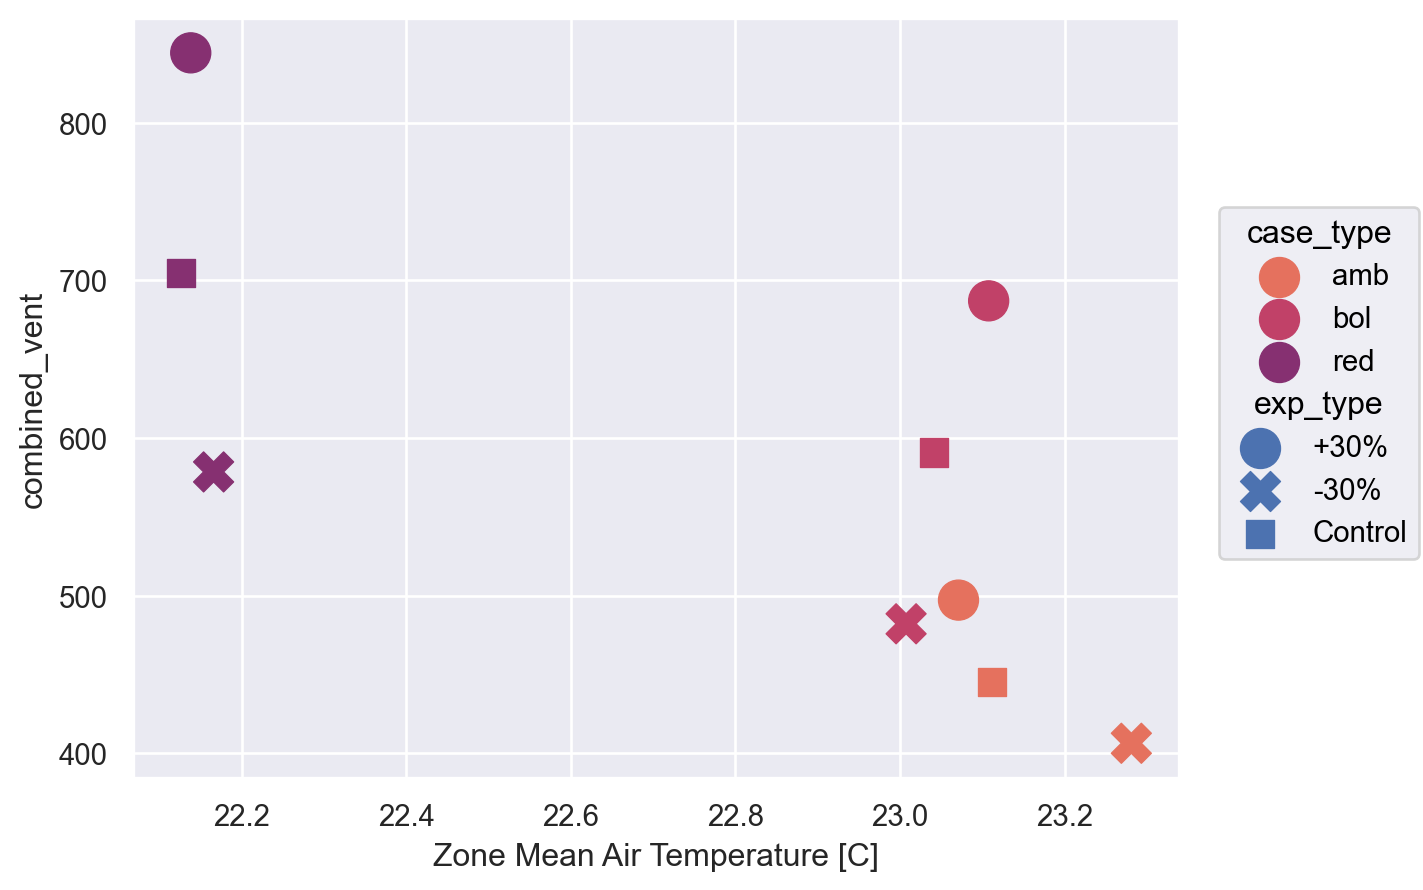

In [82]:
(so.Plot(df_agg, x="Zone Mean Air Temperature [C]", y="combined_vent", color="case_type", marker="exp_type" ).add(so.Dot(pointsize=15)).scale(color="flare").plot())
  

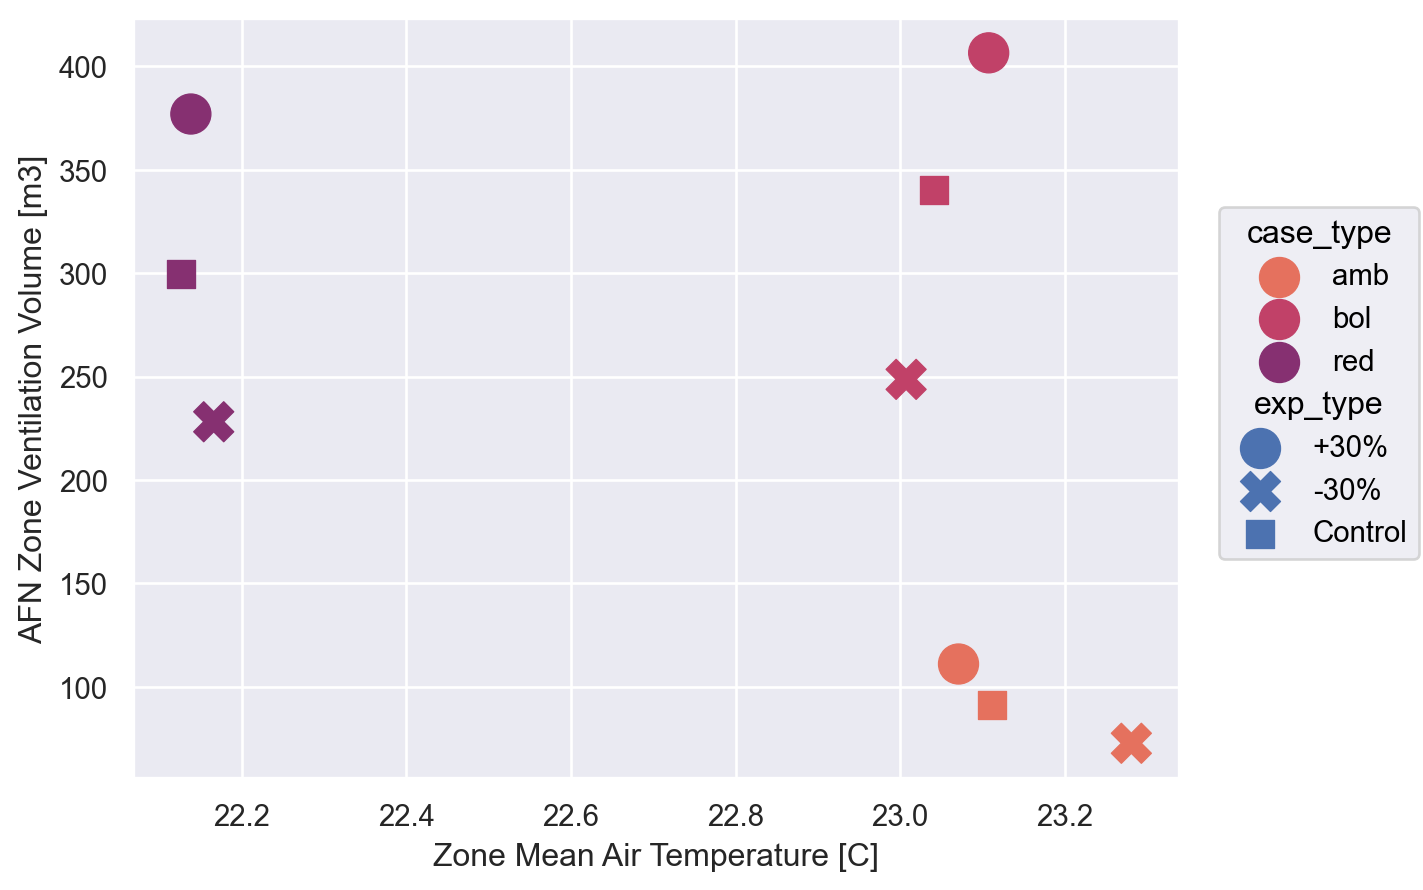

In [83]:
(so.Plot(df_agg, x="Zone Mean Air Temperature [C]", y="AFN Zone Ventilation Volume [m3]", color="case_type", marker="exp_type" ).add(so.Dot(pointsize=15)).scale(color="flare").plot())

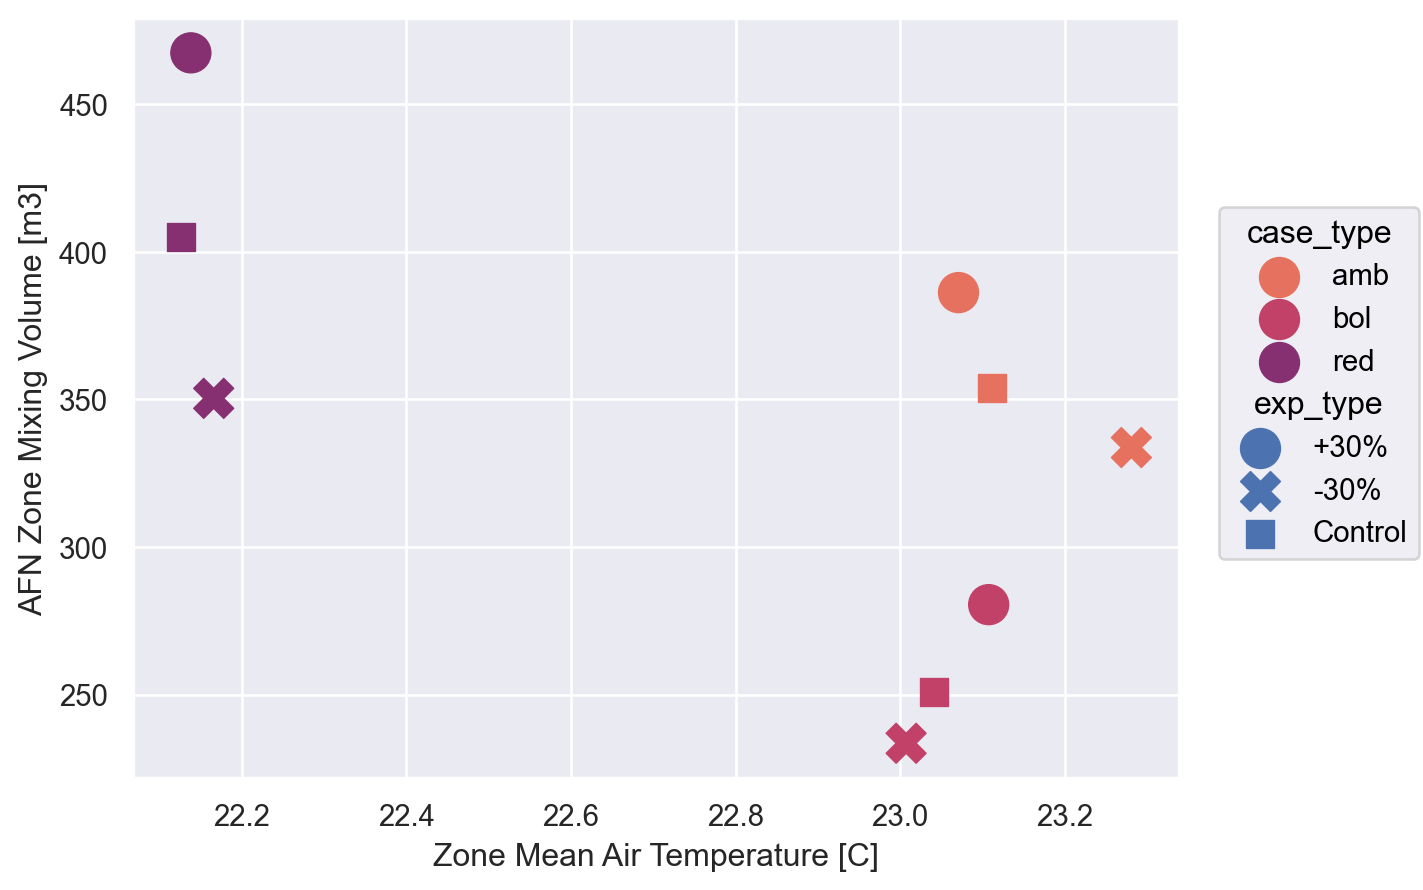

In [84]:
(so.Plot(df_agg, x="Zone Mean Air Temperature [C]", y="AFN Zone Mixing Volume [m3]", color="case_type", marker="exp_type" ).add(so.Dot(pointsize=15)).scale(color="flare").plot())